In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

all = pd.read_csv('all_lat.csv', index_col=False)
# 移除土地與車位
all = all [all ['交易標的'] != '土地']
all = all[all['交易標的'] != '車位']
all = all[all['交易年月日']>= 1060101]

# 補平均數
all['建築完成年月'] = all['建築完成年月'].fillna(all['建築完成年月'].mode()[0])
# 處理異常value
# same as 'all.set_value(all[all['建築完成年月'] == '0000///']['建築完成年月'].index[0], '建築完成年月', all['建築完成年月'].mode()[0])'
all.at[all[all['建築完成年月'] == '0000///']['建築完成年月'].index[0], '建築完成年月'] = all['建築完成年月'].mode()[0]
# float to int
all['建築完成年月'] = all['建築完成年月'].astype(int)
# to flaot
all[['lat', 'lng']] = all[['lat', 'lng']].fillna(all[['lat', 'lng']].dropna().astype(float).median()).astype(float)

c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
all['lat'].dropna().astype(float).median()

25.0293839

> https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

In [64]:
all['建築完成年月'].head()

0    1050205
1    1050205
2     841109
3    1051124
4     701231
Name: 建築完成年月, dtype: int32

### 將時間資訊整理成日月年

In [65]:
# 修改年分成西元
all['交易年月日'] = all['交易年月日'] +19110000
all['建築完成年月'] = all['建築完成年月'] +19110000
        
all['建築完成年月'] = all['建築完成年月'].astype(str)
all['交易年月日'] = all['交易年月日'].astype(str)

In [68]:
saleDate = pd.to_datetime(all['交易年月日'],format='%Y/%m/%d')
# buildDate = pd.to_datetime(all['建築完成年月'],format='%Y/%m/%d')
saleDate.head()
# train['release_dayofweek'] = saleDate.dt.dayofweek
# train['release_quarter'] = saleDate.dt.quarter

0   2017-06-21
1   2017-07-25
2   2017-06-17
3   2017-06-30
4   2017-06-20
Name: 交易年月日, dtype: datetime64[ns]

In [75]:
saleDate.dt.day[0]

21

### 交易量與月份的關係

c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.

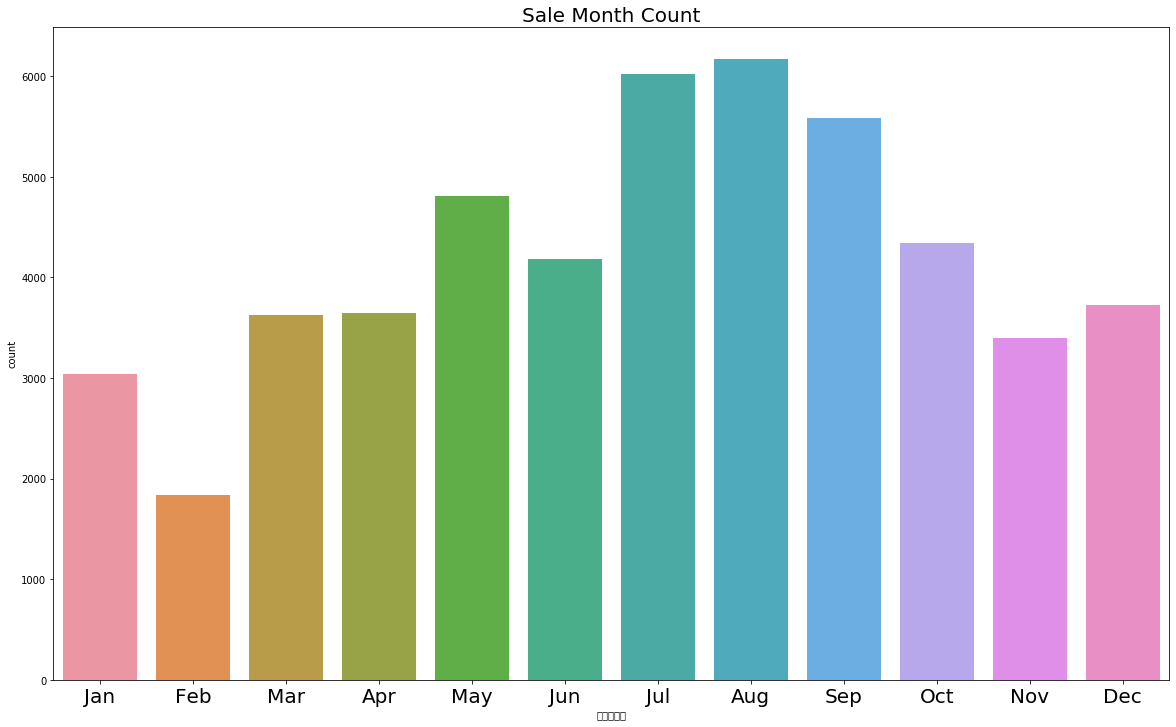

In [73]:
plt.figure(figsize=(20,12))
sns.countplot(saleDate.dt.month.sort_values())
plt.title("Sale Month Count",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

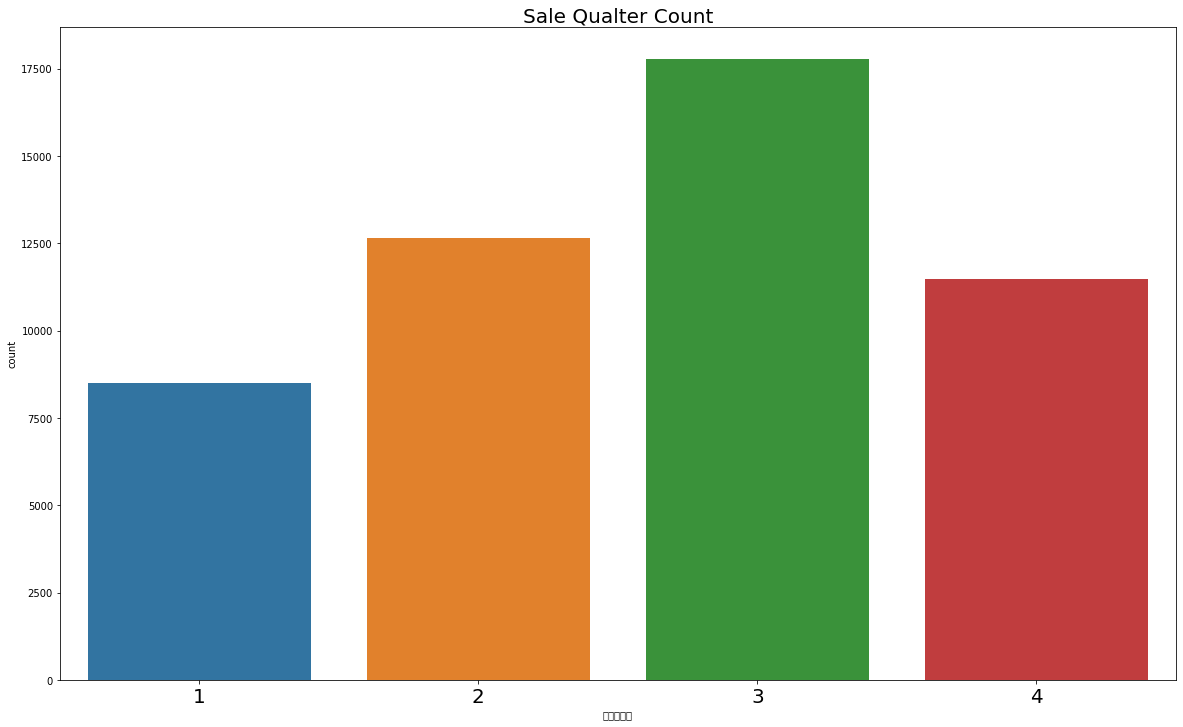

In [74]:
plt.figure(figsize=(20,12))
sns.countplot(saleDate.dt.quarter.sort_values())
plt.title("Sale Qualter Count",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(loc, labels,fontsize=20)
plt.show()

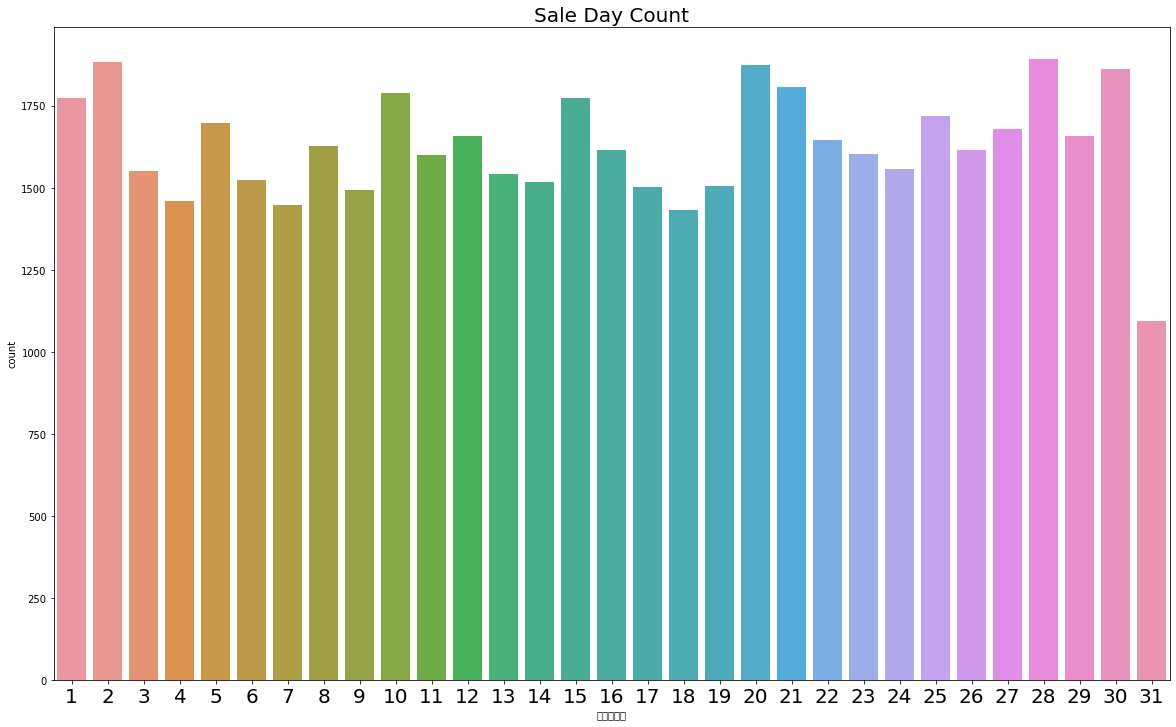

In [76]:
plt.figure(figsize=(20,12))
sns.countplot(saleDate.dt.day.sort_values())
plt.title("Sale Day Count",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

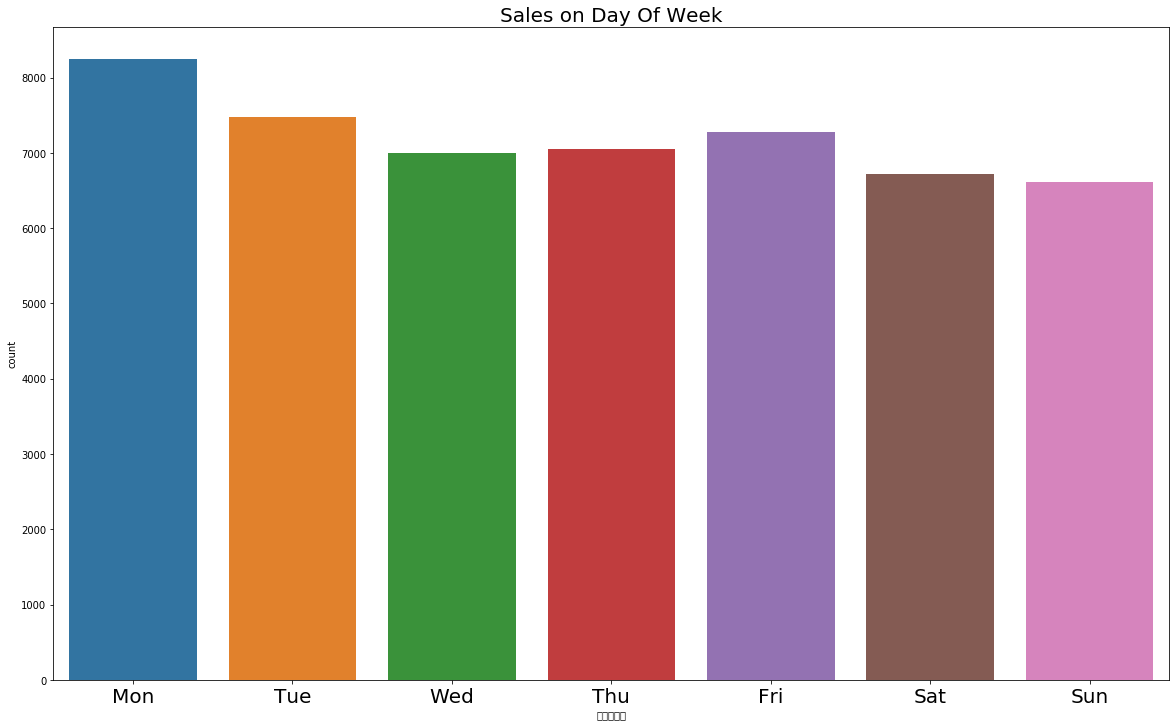

In [77]:
plt.figure(figsize=(20,12))
sns.countplot(saleDate.dt.dayofweek.sort_values())
plt.title("Sales on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

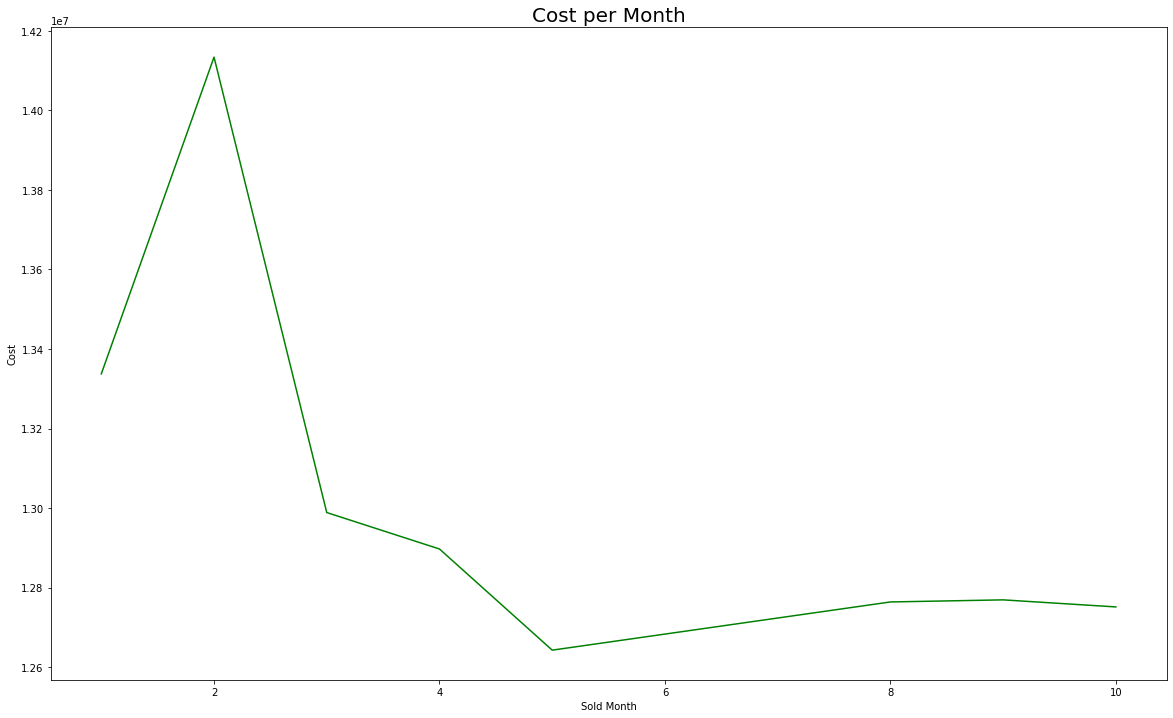

In [81]:
all['month'] = saleDate.dt.month
all['meancostByMonth'] = all.groupby('month')["總價元"].aggregate('mean')
plt.figure(figsize=(20,12))
plt.plot(all['meancostByMonth'], color="g")
plt.xlabel("Sold Month")
plt.ylabel("Cost")
plt.title("Cost per Month",fontsize=20)
plt.show()

### 經緯度 分布圖

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
all[['lat', 'lng']] = scaler2.fit_transform(all[['lat', 'lng']])
all[['lat', 'lng']].head()

,lat,lng
0,0.011232,0.026905
1,0.011232,0.026905
2,0.009826,0.029282
3,0.011015,0.023299
4,0.010220,0.029353


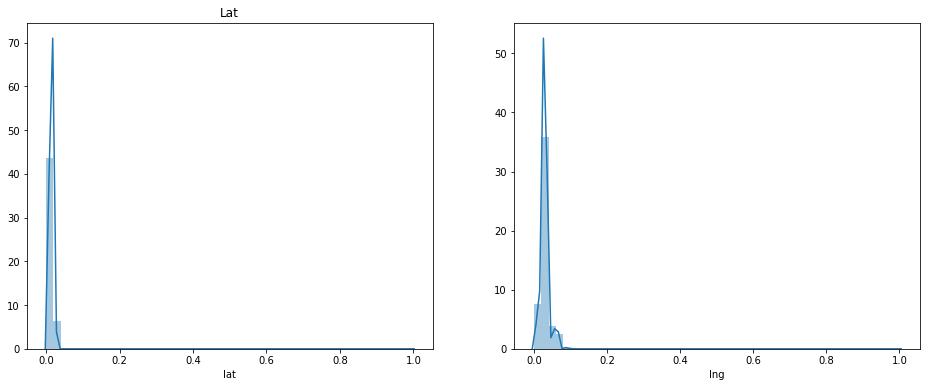

In [42]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.distplot(all['lat'])
plt.title('Lat')
plt.subplot(1, 2, 2)
sns.distplot(all['lng'])
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all[['lat', 'lng']] = scaler.fit_transform(all[['lat', 'lng']])
all[['lat', 'lng']].head()

,lat,lng
0,-0.467971,-0.244686
1,-0.467971,-0.244686
2,-0.669230,-0.075645
3,-0.499064,-0.501087
4,-0.612815,-0.070555


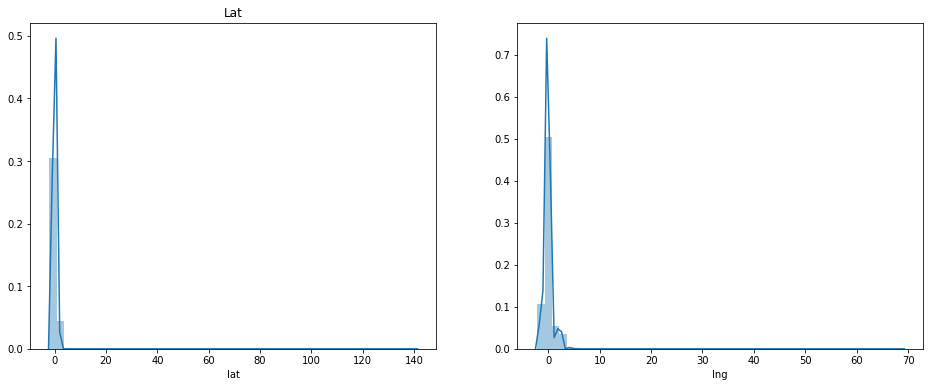

In [48]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.distplot(all['lat'])
plt.title('Lat')
plt.subplot(1, 2, 2)
sns.distplot(all['lng'])
plt.show()

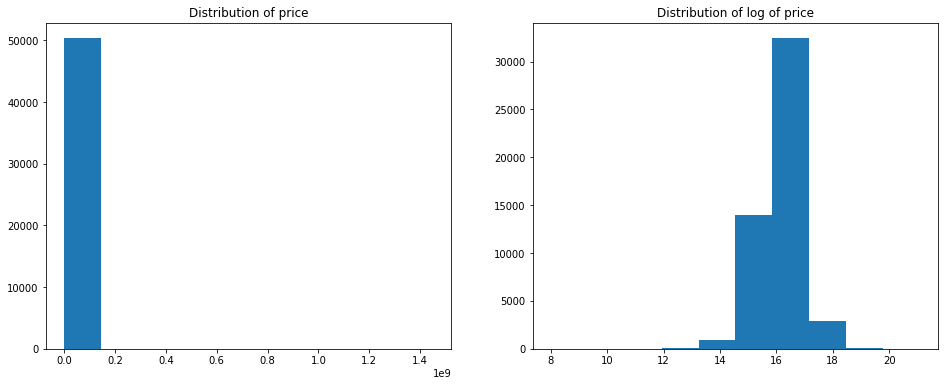

In [82]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(all['總價元']);
plt.title('Distribution of price');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(all['總價元']));
plt.title('Distribution of log of price');

In [3]:
cols = '土地 建物 車位'.split()
all[cols] = all['交易筆棟數'].str.extract(r'\D+(\d+)\D+(\d+)\D+(\d+)', expand=True)
all['建物'].value_counts()

1     49545
2       703
3        76
4        42
5        14
6        12
8         4
7         3
12        1
17        1
Name: 建物, dtype: int64

> https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
> https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/categorical_variables.html

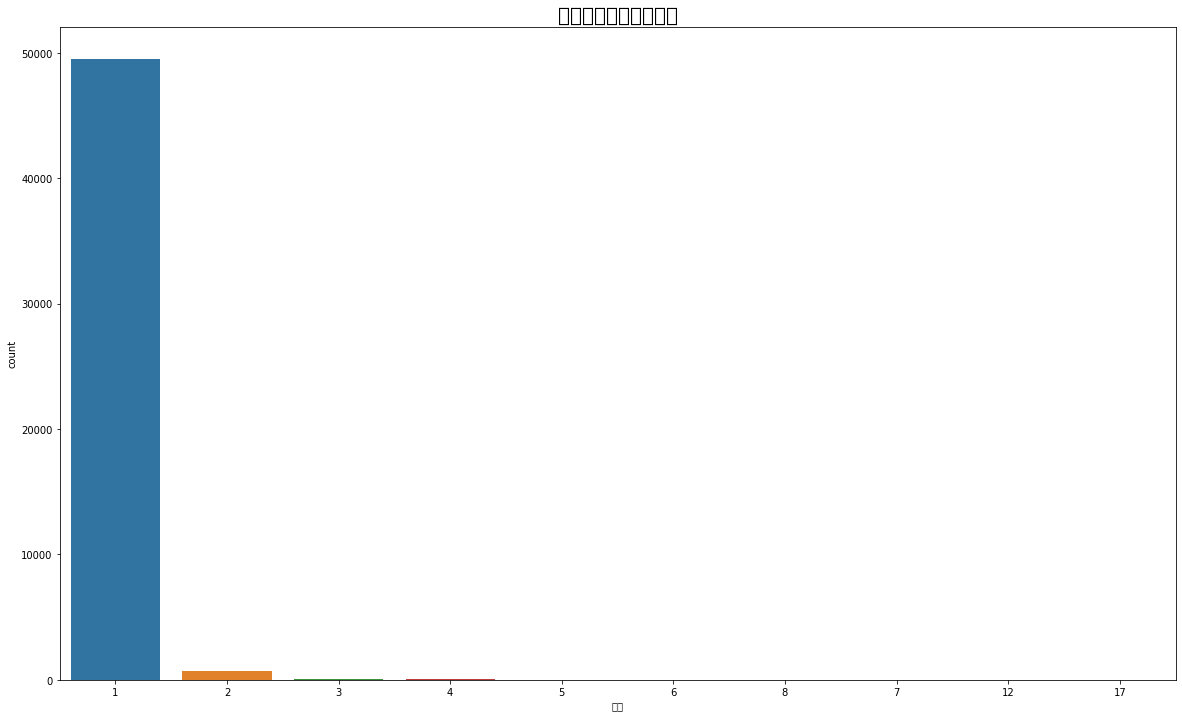

In [7]:
plt.figure(figsize=(20,12))
sns.countplot(all['建物'], order=all['建物'].value_counts().index)
plt.title("一筆資料包含多少建物",fontsize=20)
plt.show()